<a href="https://colab.research.google.com/github/Gilgamesh60/AnimeCharactersFaceRecognition-unfinished-/blob/main/cropping_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Haar cascade**

In detecting anime faces the main problem is that anime faces are extremely different from real human faces. Most anime characters have comically large eyes and almost non-existant nose. So normal haar-cascade fails while detecting anime faces. So we need use this pre-trained haar-cascade made specifically for anime character face detection.

In [ ]:
!wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
import cv2
import os
import sys
import matplotlib.pyplot as plot
!pip install Pillow ##
from PIL import Image as img

#Cropping faces of anime characters

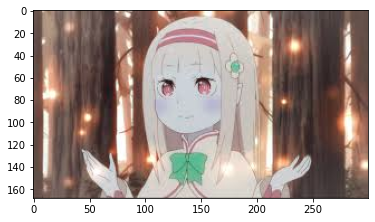

In [ ]:
#taking an image as an example
img=cv2.imread('/content/drive/MyDrive/images/emilia_re-zero/jpg_0.jpg')
plot.imshow(img)

In [ ]:
#create a matrix for completely colored image
col= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
col.shape

(168, 300, 3)

In [ ]:
col

array([[[ 75,  80,  99],
        [ 78,  83, 102],
        [ 80,  85, 105],
        ...,
        [ 73,  80,  99],
        [ 73,  80,  99],
        [ 72,  79,  98]],

       [[ 75,  80,  99],
        [ 78,  83, 102],
        [ 80,  85, 105],
        ...,
        [ 73,  80,  99],
        [ 73,  80,  99],
        [ 72,  79,  98]],

       [[ 76,  81, 100],
        [ 79,  84, 103],
        [ 80,  85, 105],
        ...,
        [ 73,  80,  99],
        [ 73,  80,  99],
        [ 72,  79,  98]],

       ...,

       [[ 82,  85, 104],
        [ 81,  84, 103],
        [ 77,  82, 102],
        ...,
        [ 70,  77,  95],
        [ 70,  77,  95],
        [ 69,  76,  94]],

       [[ 80,  83, 102],
        [ 79,  82, 101],
        [ 75,  80,  99],
        ...,
        [ 77,  84, 100],
        [ 76,  83,  99],
        [ 75,  82,  98]],

       [[ 64,  67,  86],
        [ 62,  65,  84],
        [ 58,  63,  82],
        ...,
        [ 63,  70,  86],
        [ 62,  69,  85],
        [ 61,  68,  84]]

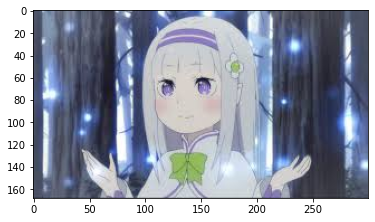

In [ ]:
plot.imshow(col)

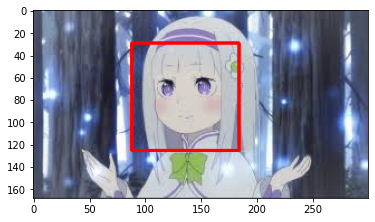

In [ ]:
#detecting the face
cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')
faces = cascade.detectMultiScale(col,scaleFactor = 1.1,minNeighbors = 5,minSize = (30, 30))
(x,y,w,h)=faces[0]
face_img=cv2.rectangle(col,(x,y),(x+w,y+h),(255,0,0),2)
plot.imshow(face_img)

#Cropping all images

In [ ]:
#let's just make this into a crop function and pass all images through it.
search_terms = ['ayanokoji kiyotaka','Rikka Takanashi','Nami','emilia re-zero','rimuru','senjogahara hitagi','miku nakano','lelouch lamperouge','hayasaka ai','marin kitagawa']
all_img=[]
def crop(image_file, cascade_file = "lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    # Create classifier
    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(image_file)
    try:
       col = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
       faces = cascade.detectMultiScale(col,scaleFactor = 1.1,minNeighbors = 5,minSize = (30, 30))
       (x,y,w,h)=faces[0]
       face_img=cv2.rectangle(col,(x,y),(x+w,y+h),(255,0,0),2)
       cropped_img=face_img[y:y+h,x:x+w]
       all_img.append(cropped_img)  
    except:
      pass

In [ ]:
k="_"
searches=[]
for search_term in search_terms:
    searches.append(k.join(search_term.lower().split(' ')))
searches

['ayanokoji_kiyotaka',
 'rikka_takanashi',
 'nami',
 'emilia_re-zero',
 'rimuru',
 'senjogahara_hitagi',
 'miku_nakano',
 'lelouch_lamperouge',
 'hayasaka_ai',
 'marin_kitagawa']

In [ ]:
main='/content/drive/MyDrive/cropped_images'
for search in searches:
  for i in range(155):
    crop(f'/content/drive/MyDrive/images/{search}/jpg_{i}.jpg')
  
  path=os.path.join(main,search)
  os.mkdir(path)
  for i in range(len(all_img)):
    data=img.fromarray(all_img[i])
    data.save(f'/content/drive/MyDrive/cropped_images/{search}/jpg_{i}.jpg')
  all_img=[]

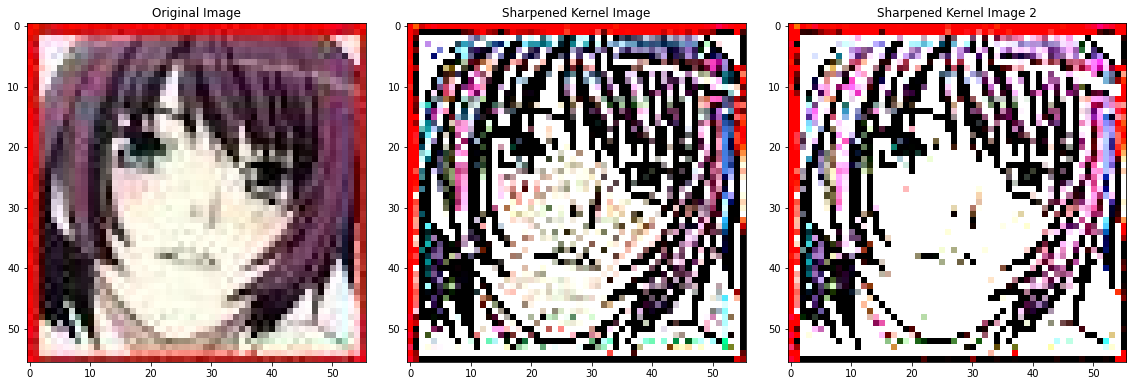

In [ ]:
import numpy as np
image = cv2.imread("/content/drive/MyDrive/cropped_images/senjogahara_hitagi/jpg_20.jpg")

fig, ax = plot.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

# To conovolve the kernel on an image we can use cv.filter2D
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

kernel_sharpening_2 = np.array([[-1, -1, -1],
                             [-1, 10, -1],
                             [-1, -1, -1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')

sharpened_2 = cv2.filter2D(image, -1, kernel_sharpening_2)
ax[2].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')

plot.show()